In [7]:
import numpy as np
import pandas as pd
import datetime as dt
import math
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns 

import env
from acquire import get_db_log_data
from wrangle import wrangle_df

In [2]:
#Acquire
df = get_db_log_data()
df.head(5)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [3]:
#prepare
df = wrangle_df(df)
df.head(5)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,2022-07-11 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
1,2018-01-26,2022-07-11 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2,2018-01-26,2022-07-11 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
3,2018-01-26,2022-07-11 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
4,2018-01-26,2022-07-11 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


In [4]:
df.shape[1]

12

In [25]:
data_students = df[df.program_id == 'data_science']
web_students = df[(df.program_id != 'data_science') & (df.program_id != None)]

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [8]:
first_date = dt.datetime(2018, 12, 31)
second_date = dt.datetime(2020, 1, 1)

log_2019 = df[(df.date > first_date) & (df.date < second_date)]

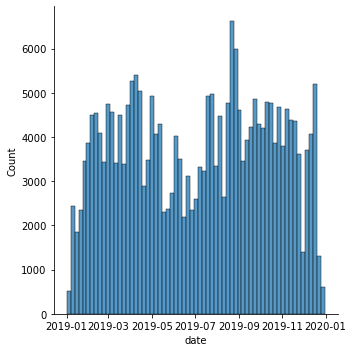

In [11]:
sns.displot(data = log_2019, x = log_2019.date);

In [12]:
df.program_id.unique()

array(['full_stack_php', 'full_stack_java', nan, 'front_end_programming',
       'data_science'], dtype=object)

In [14]:
df.program_id.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
900218    False
900219    False
900220    False
900221    False
900222    False
Name: program_id, Length: 900223, dtype: bool

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

7. Which lessons are least accessed?

In [21]:
unique_paths = pd.DataFrame(df.path.value_counts())
unique_paths

,path
/,50313
search/search_index.json,19519
javascript-i,18983
toc,18297
java-iii,13733
...,...
javascript/loops,1
content/control-structures-ii,1
javascript-ii/promisesdfghjkjhgfs,1
app,1


8. Anything else I should be aware of?